In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor

In [9]:
training_data = pd.read_csv('./datasets/Train_data.csv', index_col=0)
testing_data = pd.read_csv('./datasets/Test_data.csv', index_col=0)
training_data.head()

,avg_trip_distance_hour,avg_fare_amount_hour,avg_tolls_amount_hour,avg_tip_amount_hour,avg_Brooklyn_PU_hour,avg_Manhattan_PU_hour,avg_Queens_PU_hour,avg_Staten_Island_PU_hour,avg_Bronx_DO_hour,avg_Brooklyn_DO_hour,...,avg_Queens_DO_hour,avg_Staten_Island_DO_hour,avg_Mins_In_Ride_hour,Year,Month,Day,Hour,Minute,Second,avg_total_amount_hour
2580,2.236724,9.381992,0.000000,1.243851,0.028736,0.932950,0.022989,0.0,0.038314,0.024904,...,0.028736,0.0,8.662280,2020,4,17,13,0,0,13.582953
2534,2.240061,9.397930,0.000000,1.381967,0.014344,0.948770,0.024590,0.0,0.043033,0.026639,...,0.024590,0.0,8.702090,2020,4,15,15,0,0,13.496905
1653,2.469164,10.333324,0.000353,2.063430,0.010463,0.963948,0.024581,0.0,0.005546,0.059876,...,0.035926,0.0,10.659279,2020,3,9,22,0,0,16.207518
4281,2.099069,9.251151,0.000000,1.604006,0.022082,0.955836,0.020505,0.0,0.012618,0.031546,...,0.034700,0.0,8.363486,2020,6,27,10,0,0,13.726811
3057,2.511803,10.052960,0.004345,1.380512,0.037951,0.922201,0.017078,0.0,0.036053,0.039848,...,0.022770,0.0,9.328482,2020,5,7,10,0,0,13.604888


In [3]:
training_data = training_data.fillna(0)
testing_data = testing_data.fillna(0)

In [4]:
X_train = training_data.drop(['avg_total_amount_hour'], axis=1)
X_test = testing_data.drop(['avg_total_amount_hour'], axis=1)
y_train = training_data['avg_total_amount_hour']
y_test = testing_data['avg_total_amount_hour']

In [5]:
rfr = RandomForestRegressor(max_depth=9, n_estimators=5)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [12]:
predicted_df = X_test.join(pd.DataFrame(y_pred, index=y_test.index))
predicted_df = predicted_df.rename(columns={0:'y_pred'})
hourly_df = predicted_df.groupby('Hour').mean()
hourly_df.head()

,avg_trip_distance_hour,avg_fare_amount_hour,avg_tolls_amount_hour,avg_tip_amount_hour,avg_Brooklyn_PU_hour,avg_Manhattan_PU_hour,avg_Queens_PU_hour,avg_Staten_Island_PU_hour,avg_Bronx_DO_hour,avg_Brooklyn_DO_hour,avg_Manhattan_DO_hour,avg_Queens_DO_hour,avg_Staten_Island_DO_hour,avg_Mins_In_Ride_hour,Year,Month,Day,Minute,Second,y_pred
Hour,,,,,,,,,,,,,,,,,,,,
0.0,3.155901,11.833621,0.001662,1.428250,0.031018,0.885512,0.060859,0.000048,0.056581,0.082094,0.779328,0.081950,0.000048,10.825943,1989.850746,3.432836,18.179104,0.0,0.0,16.250067
1.0,3.168207,11.870486,0.001605,1.412849,0.054192,0.872980,0.047187,0.000015,0.066982,0.110867,0.744059,0.078078,0.000015,10.912933,2020.000000,3.358491,15.245283,0.0,0.0,16.694022
2.0,3.516940,12.952709,0.001706,1.250985,0.060054,0.860430,0.051879,0.000000,0.067738,0.102632,0.728856,0.100773,0.000000,11.404963,2020.000000,3.511111,15.066667,0.0,0.0,17.793389
3.0,3.103090,11.904712,0.002179,1.252898,0.038931,0.905489,0.037299,0.000806,0.048319,0.093675,0.767261,0.089939,0.000806,10.514233,2020.000000,3.109091,15.545455,0.0,0.0,16.960167
4.0,3.976698,14.383519,0.004599,1.035089,0.085109,0.814954,0.068447,0.000232,0.073441,0.111765,0.691390,0.123172,0.000232,11.739931,2020.000000,3.813559,15.694915,0.0,0.0,18.622421


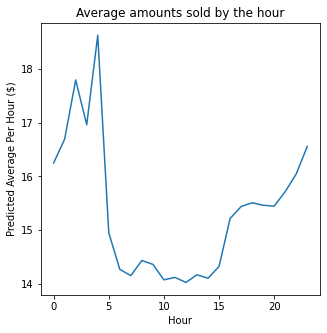

In [7]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Hour', y='y_pred', data=hourly_df)
plt.xlabel('Hour')
plt.ylabel('Predicted Average Per Hour ($)')
plt.title('Average amounts sold by the hour')
plt.show()

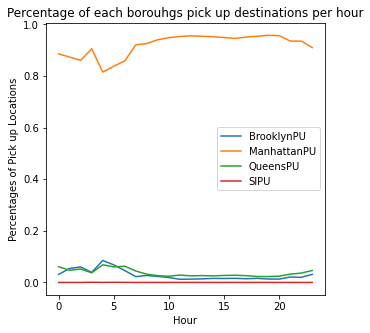

In [25]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Hour', y='avg_Brooklyn_PU_hour', data=hourly_df)
sns.lineplot(x='Hour', y='avg_Manhattan_PU_hour', data=hourly_df)
sns.lineplot(x='Hour', y='avg_Queens_PU_hour', data=hourly_df)
sns.lineplot(x='Hour', y='avg_Staten_Island_PU_hour', data=hourly_df)
plt.xlabel('Hour')
plt.ylabel('Percentages of Pick up Locations')
plt.title('Percentage of each borouhgs pick up destinations per hour')
plt.legend(['BrooklynPU', 'ManhattanPU', 'QueensPU', 'SIPU'])
plt.show()

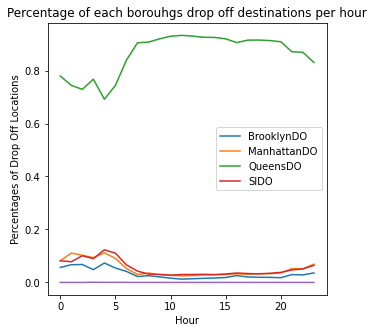

In [24]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Hour', y='avg_Bronx_DO_hour', data=hourly_df)
sns.lineplot(x='Hour', y='avg_Brooklyn_DO_hour', data=hourly_df)
sns.lineplot(x='Hour', y='avg_Manhattan_DO_hour', data=hourly_df)
sns.lineplot(x='Hour', y='avg_Queens_DO_hour', data=hourly_df)
sns.lineplot(x='Hour', y='avg_Staten_Island_DO_hour', data=hourly_df)
plt.xlabel('Hour')
plt.ylabel('Percentages of Drop Off Locations')
plt.title('Percentage of each borouhgs drop off destinations per hour')
plt.legend(['BrooklynDO', 'ManhattanDO', 'QueensDO', 'SIDO'])
plt.show()